✅ Accuracy: 1.0


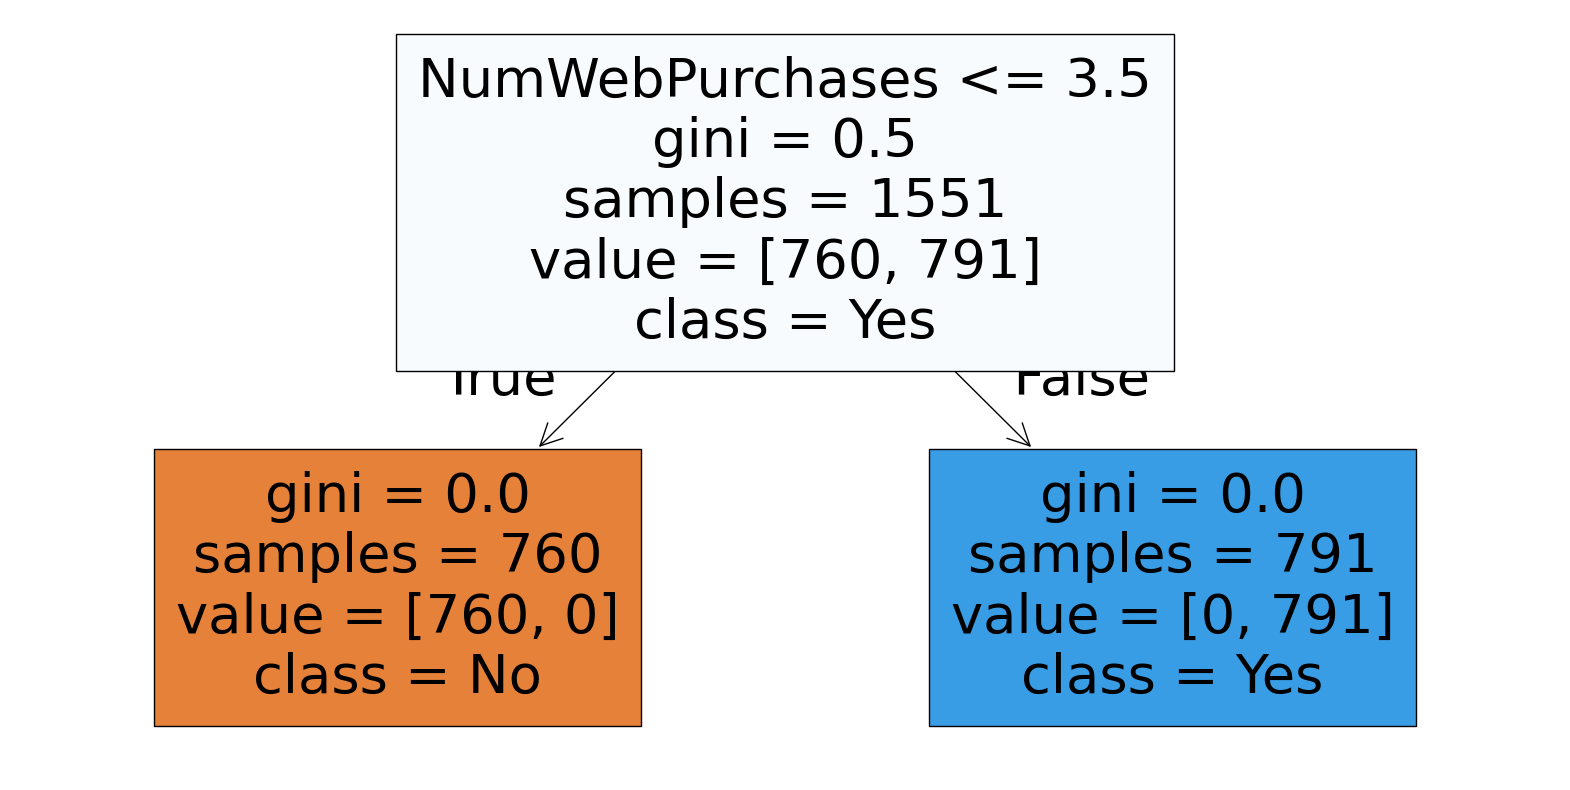

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')  # Kaggle file is tab-separated

# Drop NA and irrelevant columns
df.dropna(inplace=True)
df.drop(columns=["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue"], inplace=True)

# Encode categorical columns
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define target: Let's predict if someone made a purchase in the campaign
df["Target"] = (df["NumWebPurchases"] > 3).astype(int)

X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()
